# 讀入套件

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

# 讀入資料庫

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [4]:
# Load Fashine MNIST
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Reshape size
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Normalize the range of featurs
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 設計流程

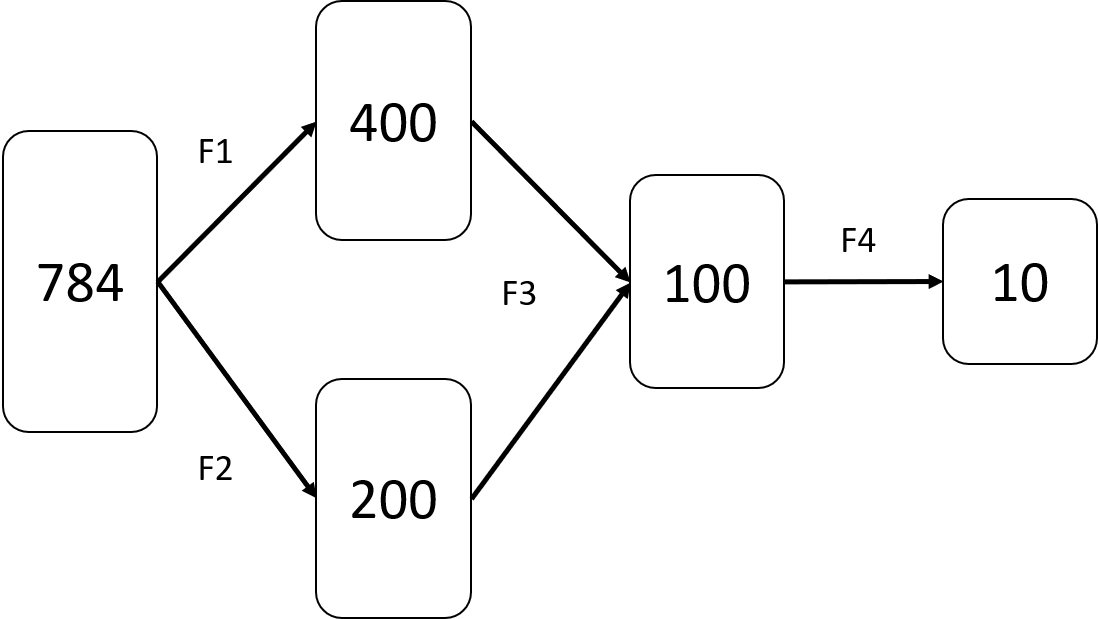

In [9]:
from IPython.display import Image
Image(filename = 'FLOW.png' , width=500, height=100)

In [10]:
x = Input(shape=(784,))
f_1 = Dense(400, activation='sigmoid')
f_2 = Dense(200, activation='sigmoid')
f_3 = Dense(100, activation='sigmoid')
f_last = Dense(10, activation='softmax')

In [13]:
#函數間的關係

x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)

u = concatenate([h_2, h_1])
h_3 = f_3(u)

y = f_last(h_3)

# 訓練模型

In [14]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      input_3[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 400)          314000      input_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 600)          0           dense_1[1][0]                    
                                                                 dense[1][0]                      
__________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer="sgd",metrics=['categorical_accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 2.1680 - categorical_accuracy: 0.4144 - val_loss: 2.0138 - val_categorical_accuracy: 0.5670
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 1.8214 - categorical_accuracy: 0.6124 - val_loss: 1.6328 - val_categorical_accuracy: 0.6444
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 1.4781 - categorical_accuracy: 0.6610 - val_loss: 1.3509 - val_categorical_accuracy: 0.6763
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 1.2506 - categorical_accuracy: 0.6866 - val_loss: 1.1727 - val_categorical_accuracy: 0.6826
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 1.1001 - categorical_accuracy: 0.7005 - val_loss: 1.0484 - val_categorical_accuracy: 0.7035


In [19]:
score = model.evaluate(x_train, y_train, batch_size=100)
print(f'Loss: {score[0]}')

60000/60000 [==============================] - 2s 25us/sample - loss: 1.0404 - categorical_accuracy: 0.7077
Loss: 1.0404462127884229


※小小結論：準確率似乎有點低，可能等暑假比要有空再來研究神經網路該怎麼設計